In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
data = pd.read_csv('data_science_salaries.csv')

# Step 1: Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Step 2: Check for duplicates and remove if any
data = data.drop_duplicates()

# Step 3: Encode categorical variables
categorical_cols = ['job_title', 'experience_level', 'employment_type', 
                    'work_models', 'employee_residence', 
                    'salary_currency', 'company_location', 'company_size']

# Using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 4: Check for outliers in salary_in_usd using the IQR method
q1, q3 = data['salary_in_usd'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove rows with outliers in salary_in_usd
data_cleaned = data_encoded[(data['salary_in_usd'] >= lower_bound) & 
                            (data['salary_in_usd'] <= upper_bound)]

# Display summary of cleaned data
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6492 entries, 0 to 6598
Columns: 325 entries, work_year to company_size_Small
dtypes: bool(322), int64(3)
memory usage: 2.2 MB
None
   work_year  salary  salary_in_usd  job_title_AI Developer  \
0       2024  148100         148100                   False   
1       2024   98700          98700                   False   
2       2024  140032         140032                   False   
3       2024  100022         100022                   False   
4       2024  120000         120000                   False   

   job_title_AI Engineer  job_title_AI Product Manager  \
0                  False                         False   
1                  False                         False   
2                  False                         False   
3                  False                         False   
4                  False                         False   

   job_title_AI Programmer  job_title_AI Research Engineer  \
0                    False       

In [2]:
# Partition dataset 
data_train, data_test = train_test_split(data_cleaned, test_size = 0.20, random_state = 7)

In [4]:
# Confirm split proportions
split_proportions = pd.DataFrame({'Dataset': ['Training', 'Test'],
                                  'Proportion': [len(data_train) / len(data_cleaned), len(data_test) / len(data_cleaned)]
})

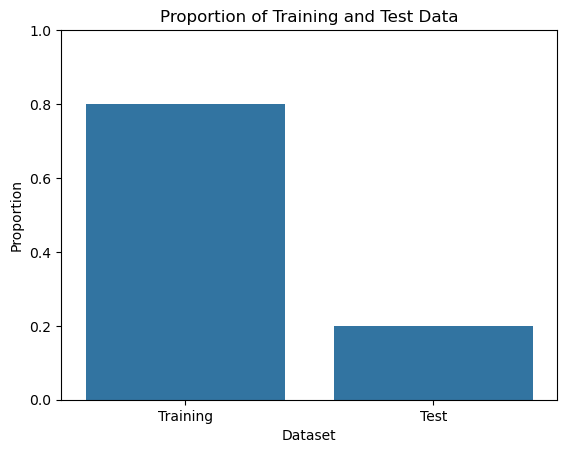

In [5]:
sns.barplot(x='Dataset', y='Proportion', data=split_proportions)

plt.title('Proportion of Training and Test Data')
plt.ylabel('Proportion')
plt.xlabel('Dataset')
plt.ylim(0, 1)
plt.show()

In [7]:
# Check dimensions of partitions
print(data_cleaned.shape)
print(data_train.shape)
print(data_test.shape)

(6492, 325)
(5193, 325)
(1299, 325)


In [ ]:
# Rebalance